In [1]:
from roulette import Roulette
from core import *
from simulations_core import *
from simulations_plots_core import *
roulette = Roulette()

In [2]:
def martingale_betting(goal_money_won, bet):
    return goal_money_betting_even_bet(roulette, goal_money_won, bet, lambda bet_history : (bet_history[-1]*2, bet_history), 
                                        lambda bet_history : (1, bet_history))

In [3]:
money_histories = simulate_different_goal_money(
                    betting_type = martingale_betting, 
                    goal_money_list = [10, 100, 500, 1000], 
                    number_histories = 1000)

## Analysis when the goal is to win 10 units

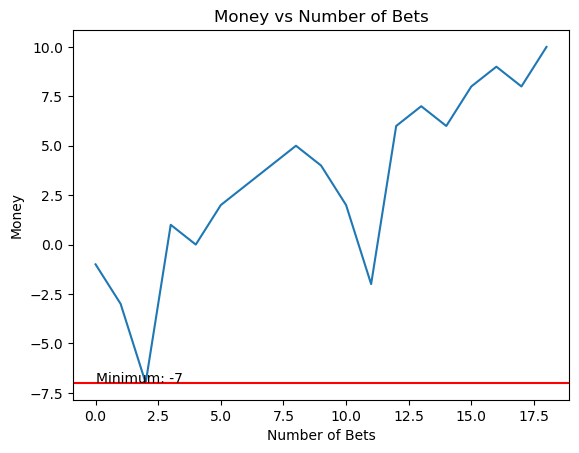

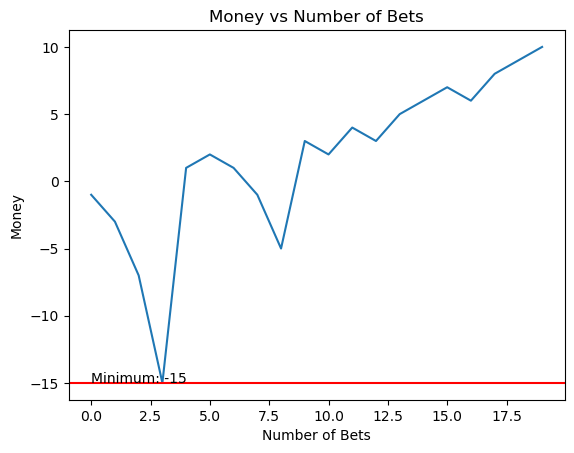

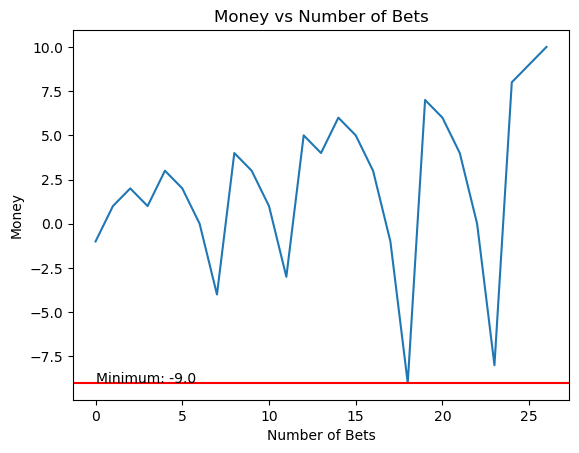

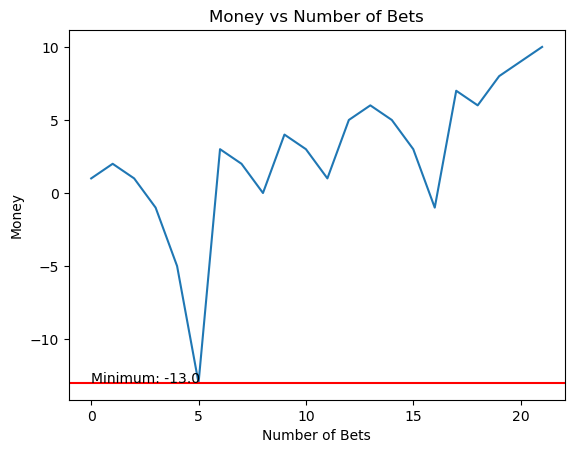

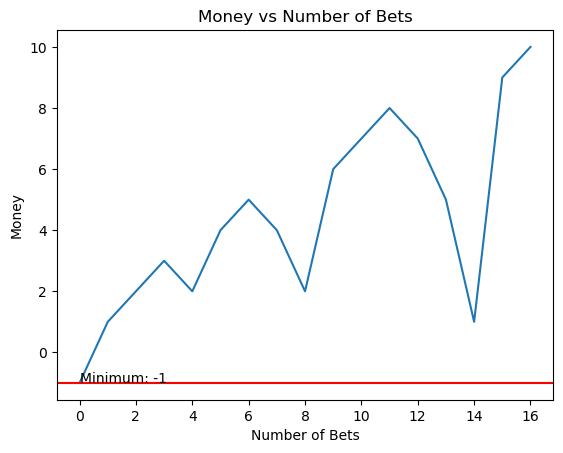

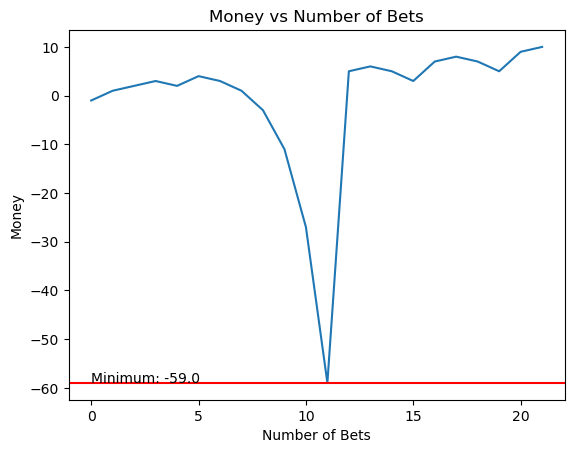

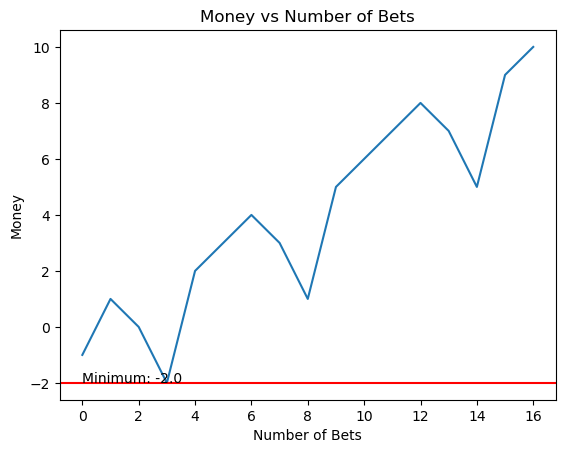

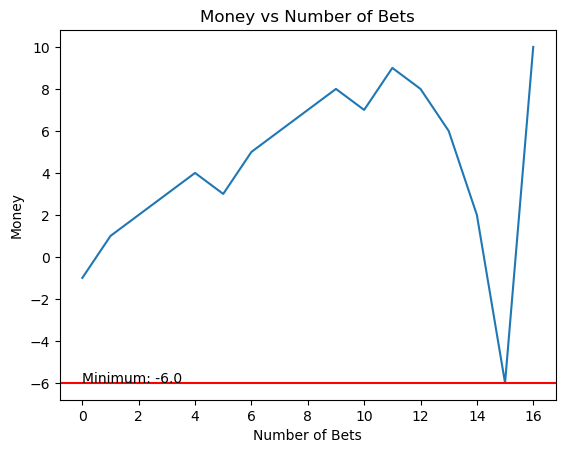

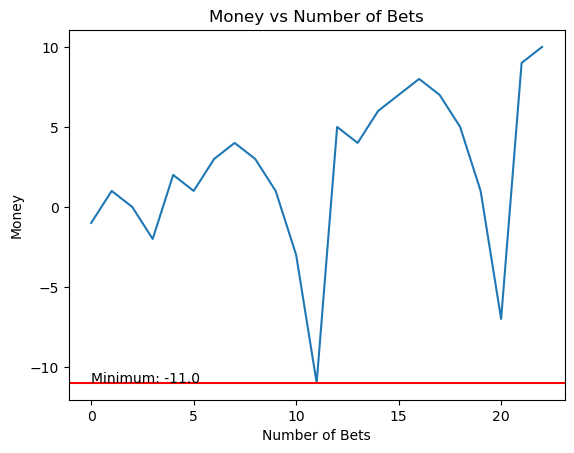

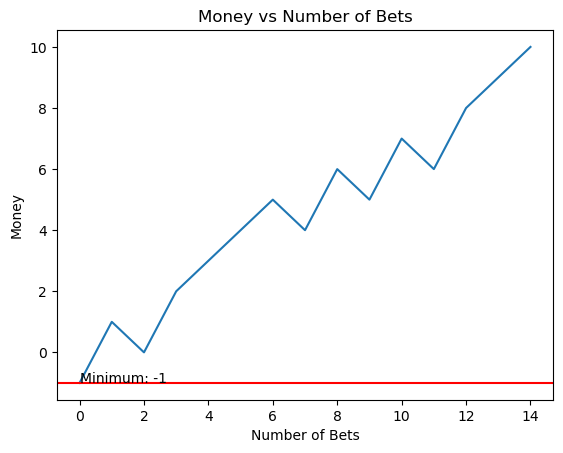

In [4]:
plot_money_histories(money_histories, 10)

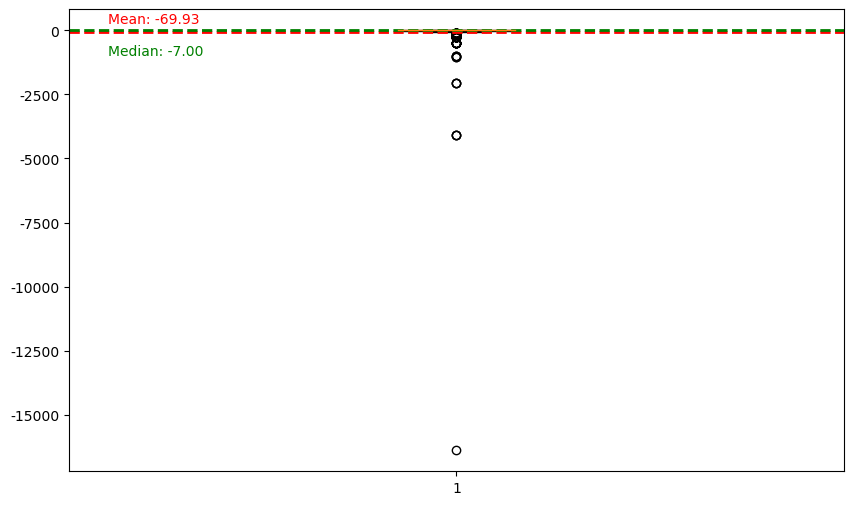

In [5]:
plot_minimum_money(money_histories, 10)

## Analysis when the goal is to win 100 units

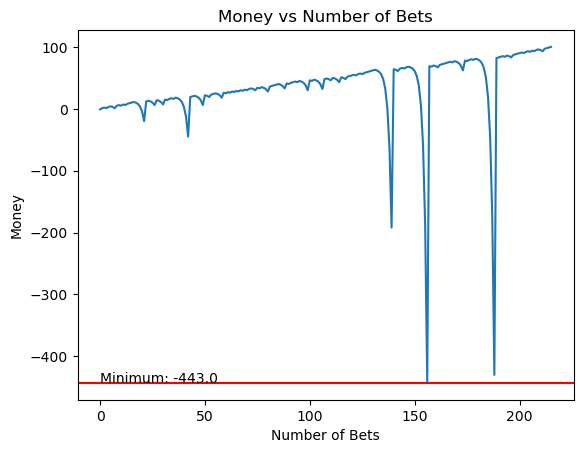

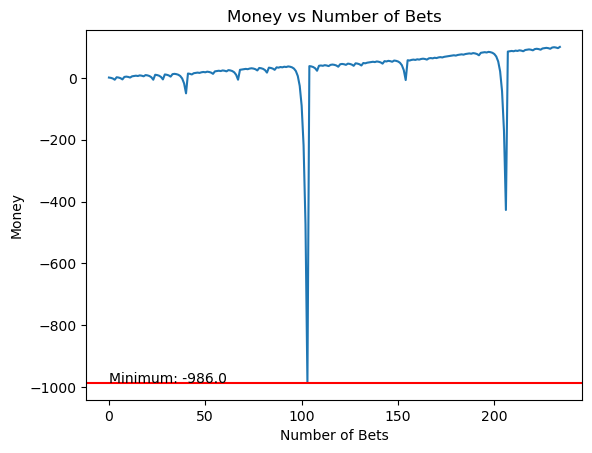

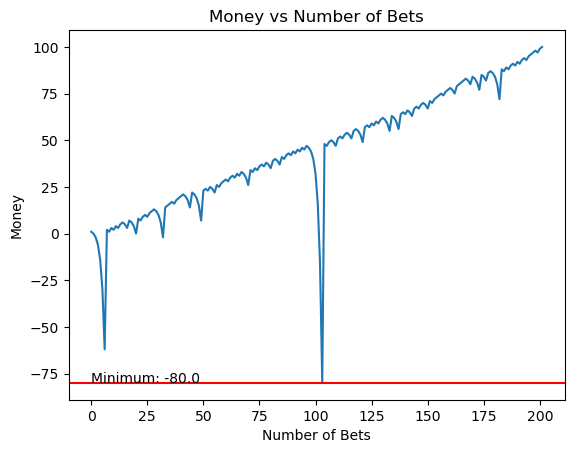

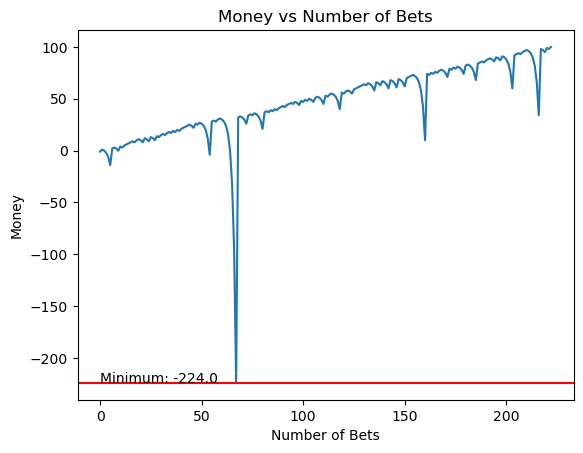

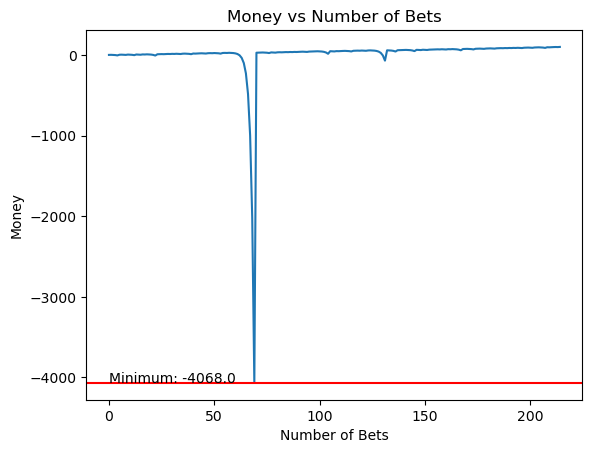

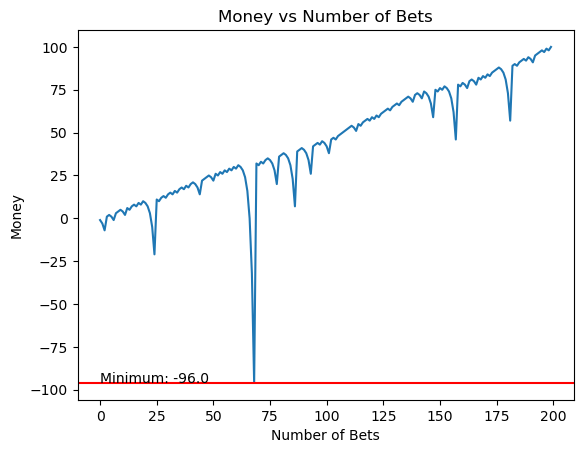

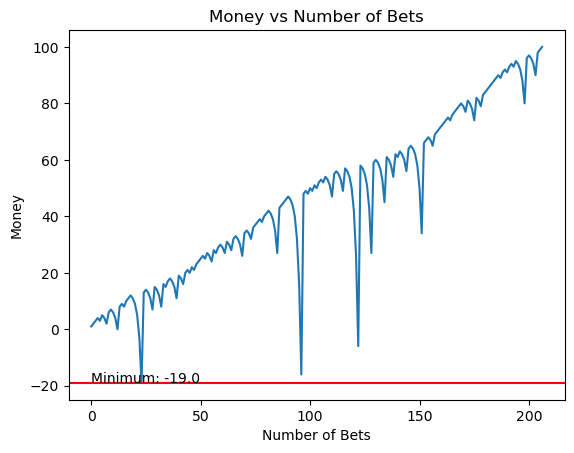

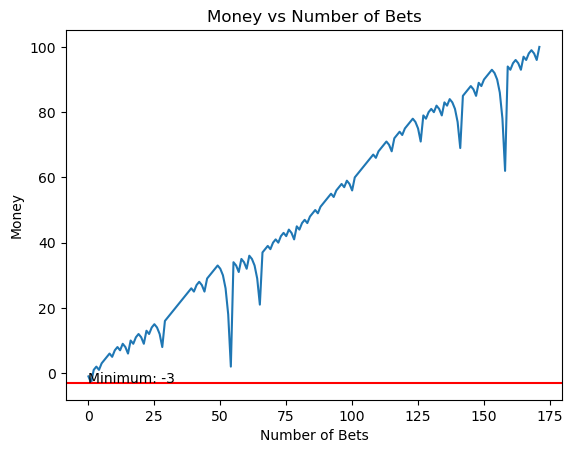

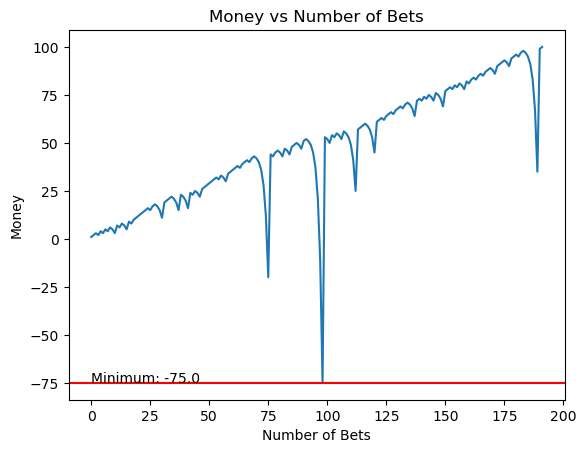

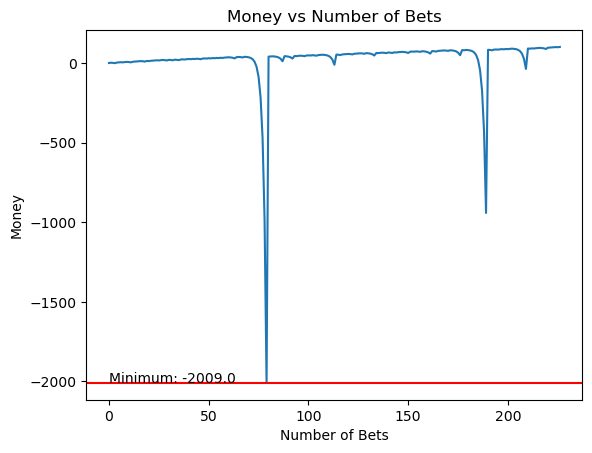

In [6]:
plot_money_histories(money_histories, 100)

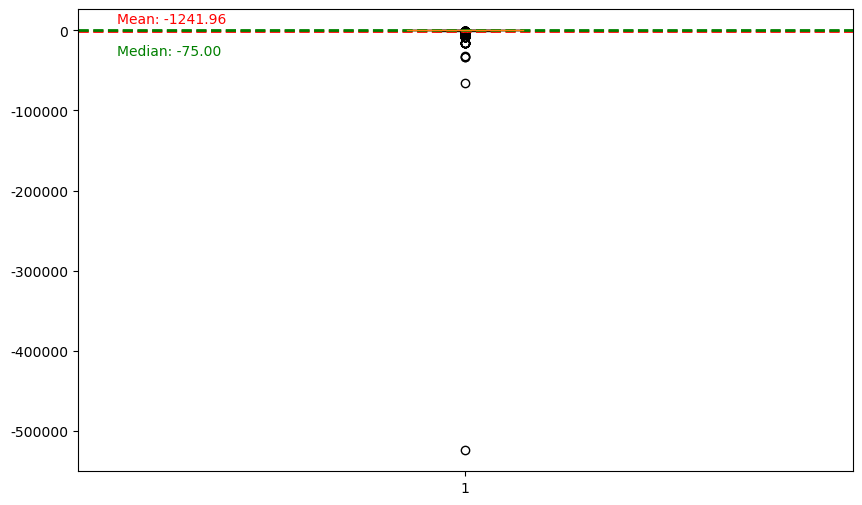

In [7]:
plot_minimum_money(money_histories, 100)

## Analysis when the goal is to win 500 units

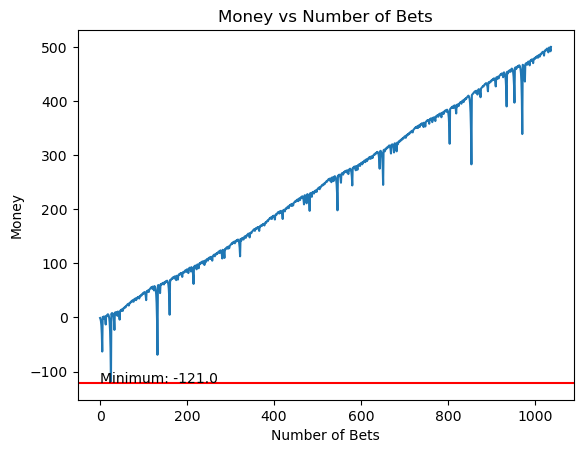

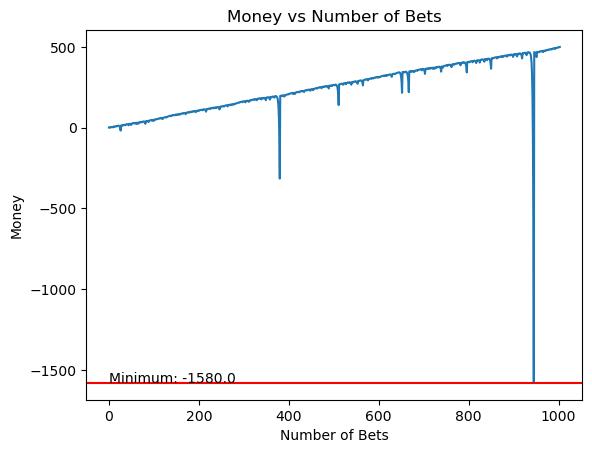

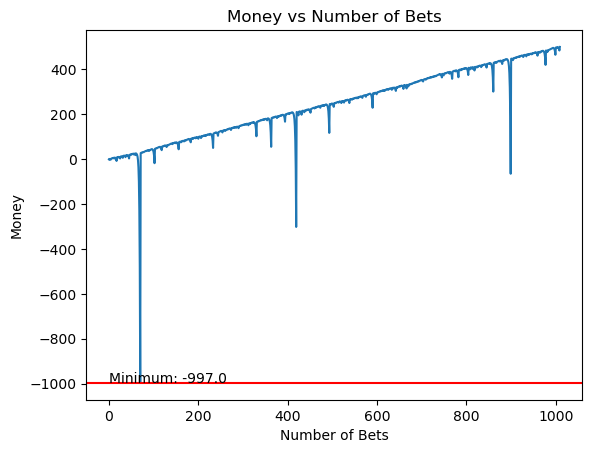

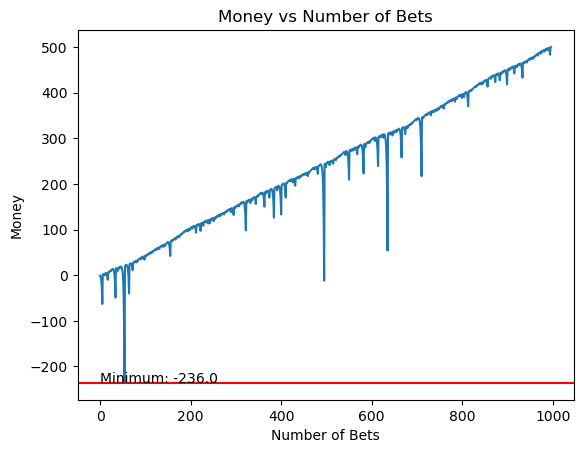

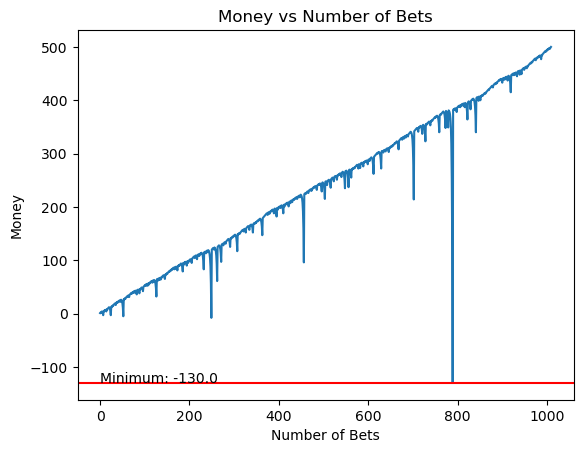

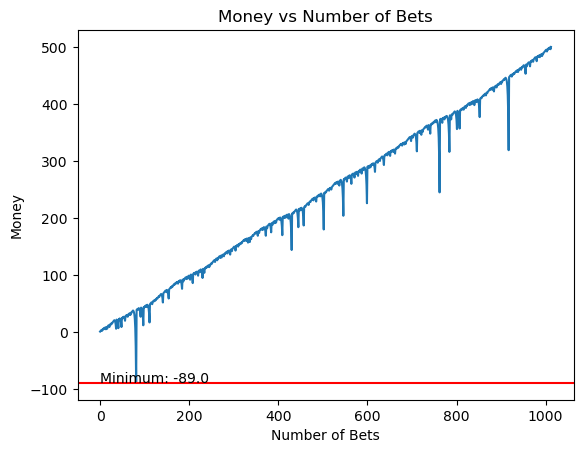

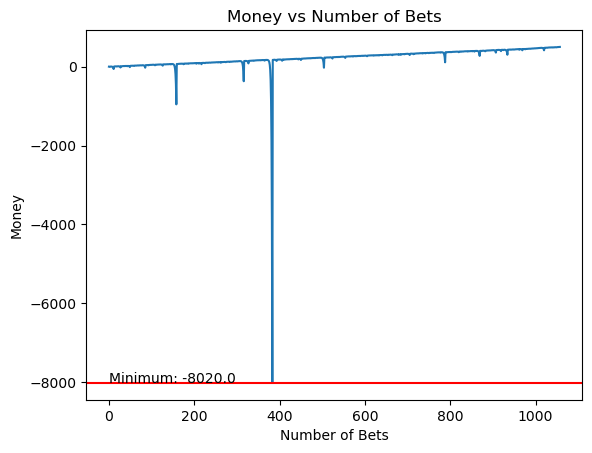

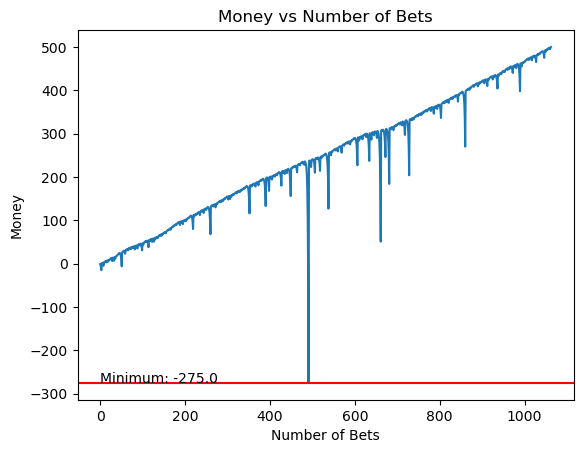

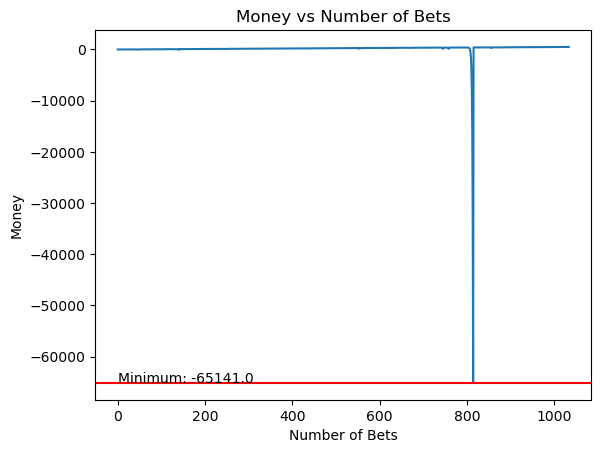

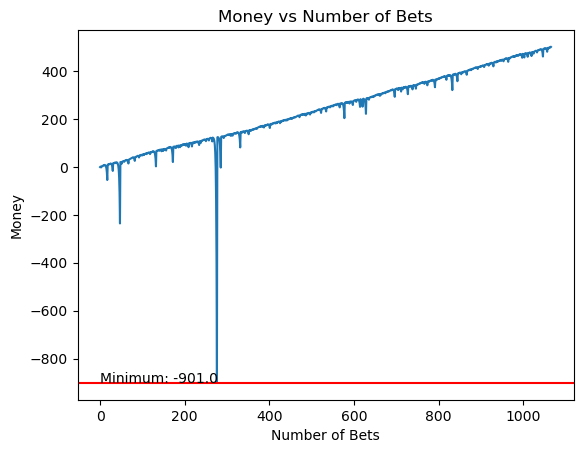

In [8]:
plot_money_histories(money_histories, 500)

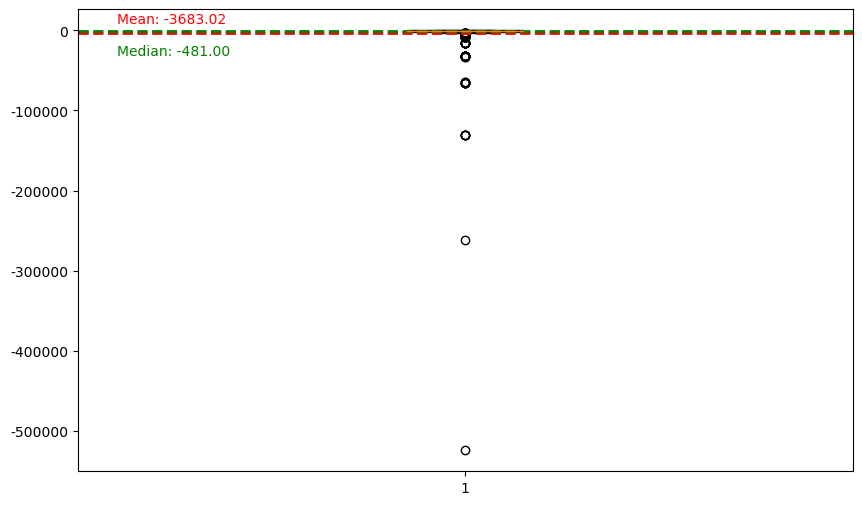

In [9]:
plot_minimum_money(money_histories, 500)

## Analysis when the goal is to win 1000 units

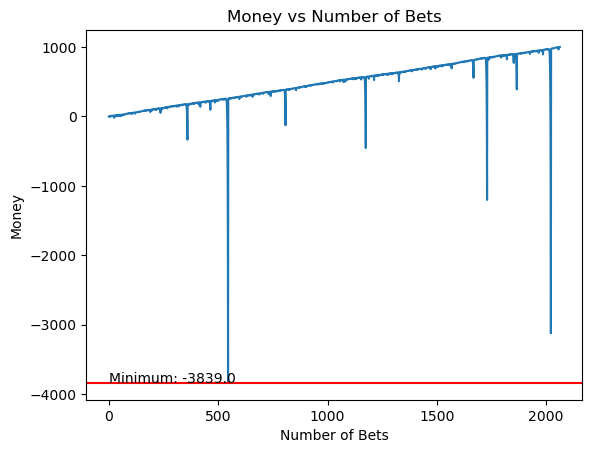

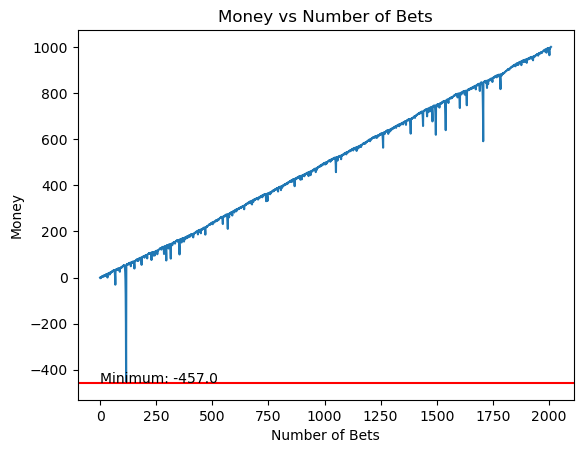

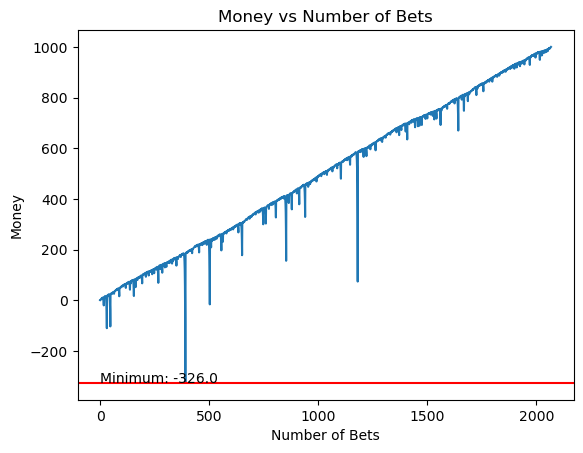

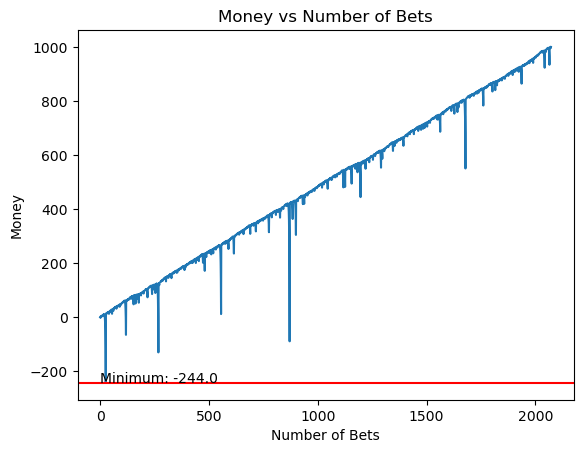

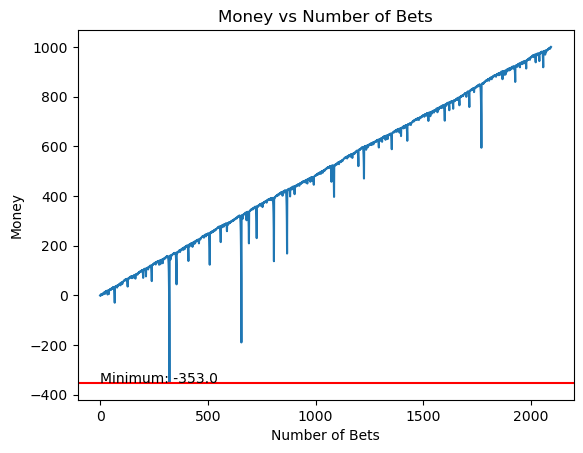

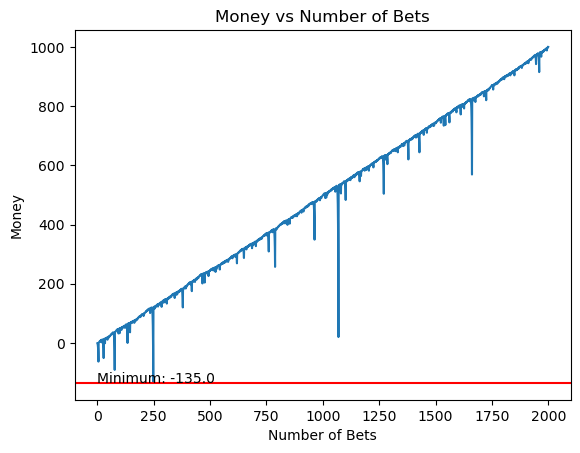

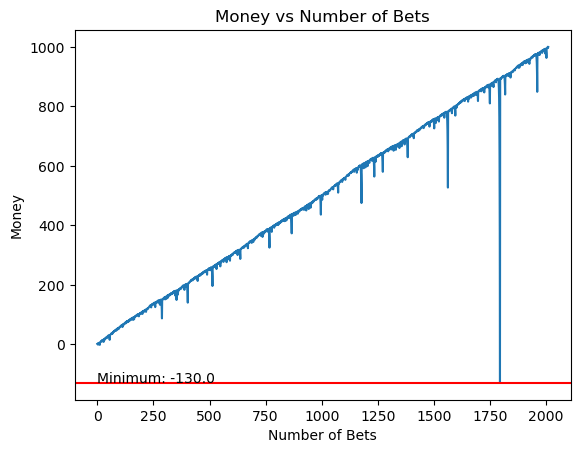

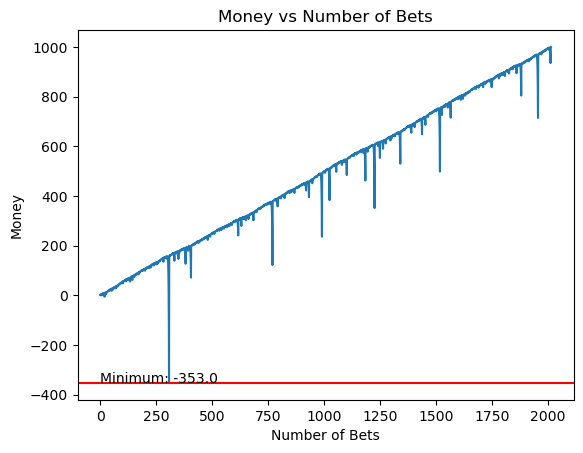

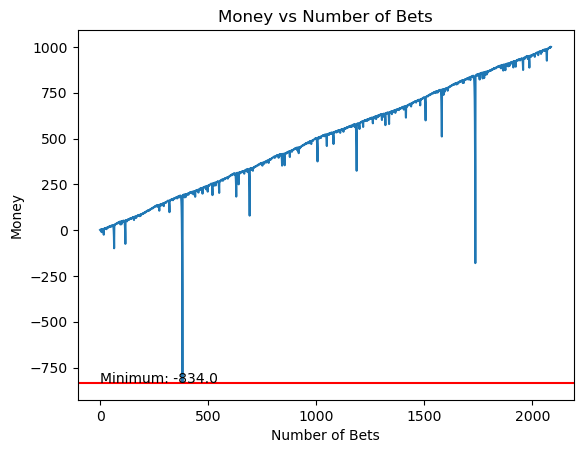

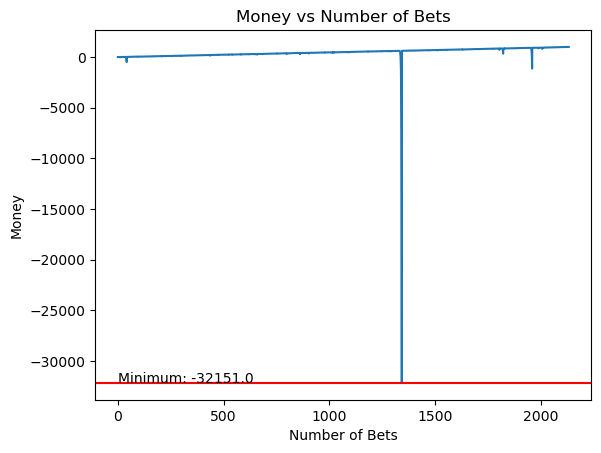

In [10]:
plot_money_histories(money_histories, 1000)

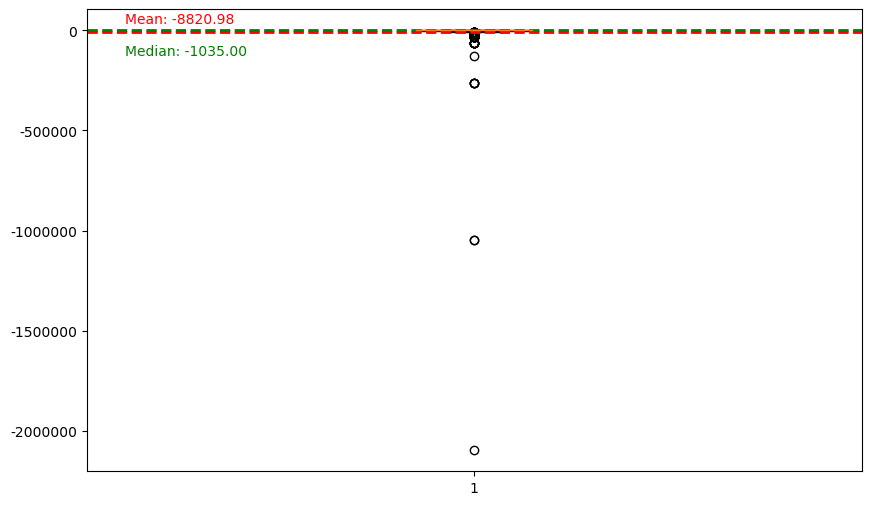

In [11]:
plot_minimum_money(money_histories, 1000)